In [106]:
from pandas import DataFrame, read_csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Times New Roman'],'size':18},weight='bold')

conv=1000*27.212

def fdE2(p34,p70):
    conv=1000*27.212
    if len(p34.index)==1:
        return (np.array(p34['energy'])-np.array(p70['energy']))[0]*conv
    else:
        return (np.array(p34['energy'])-np.array(p70['energy']))*conv

def fdE(dimer,m1,m2):
    conv=1000*27.212
    return (np.array(dimer['energy'])-np.array(m1['energy'])-np.array(m2['energy']))[0]*conv

def fccsdtcbs(dfg,cbs,zo):
    aVXZ={'aVDZ':2,'aVTZ':3,'aVQZ':4}
    X1=aVXZ[cbs['X1']]
    X2=aVXZ[cbs['X2']]
    sel=dfg[(dfg['zo']==zo)]
    sels=sel[(sel['method']=='hf') & (sel['basis']==cbs['X1'])]
    dEhf1=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    sels=sel[(sel['method']=='hf') & (sel['basis']==cbs['X2'])]
    dEhf2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    dEhfcbs=(dEhf2*np.exp(-1.63*X1)-dEhf1*np.exp(-1.63*X2))/(np.exp(-1.63*X1)-np.exp(-1.63*X2))
    # print(dEhf1/43.363,dEhf2/43.363,dEhfcbs/43.363)
    sels=sel[(sel['method']=='mp2') & (sel['basis']==cbs['X1'])]
    dEmp21=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    sels=sel[(sel['method']=='mp2') & (sel['basis']==cbs['X2'])]
    dEmp22=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    dEmp2cor1=dEmp21-dEhf1
    dEmp2cor2=dEmp22-dEhf2
    dEmp2corcbs=(dEmp2cor2*X1**(-3)-dEmp2cor1*X2**(-3))/(X1**(-3)-X2**(-3))
    # print(dEmp2cor1/43.363,dEmp2cor2/43.363,dEmp2corcbs/43.363)
    dEmp2cbs=dEhfcbs+dEmp2corcbs
    # print(dEmp2cbs/43.363)
    sels=sel[(sel['method']=='mp2') & (sel['basis']==cbs['smlbs'])]
    dEmp2sml=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    sels=sel[(sel['method']=='ccsdt') & (sel['basis']==cbs['smlbs'])]
    dEccsdtsml=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    dEdiffccsdtmp2=dEccsdtsml-dEmp2sml
    dEccsdtcbs=dEmp2cbs+dEdiffccsdtmp2
    # print(dEccsdtcbs/43.363)
    return (dEccsdtcbs)

def fccsdtcbsT(dfg,cbs,zo):
    aVXZ={'aVDZ':2,'aVTZ':3,'aVQZ':4}
    X1=aVXZ[cbs['X1']]
    X2=aVXZ[cbs['X2']]
    sel=dfg[(dfg['zo']==zo)]
    sels=sel[(sel['method']=='hf') & (sel['basis']==cbs['X1'])]
    dEhf1=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    sels=sel[(sel['method']=='hf') & (sel['basis']==cbs['X2'])]
    dEhf2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    dEhfcbs=(dEhf2*X1**(-4.93)-dEhf1*X2**(-4.93))/(X1**(-4.93)-X2**(-4.93))
    # print(dEhf1/43.363,dEhf2/43.363,dEhfcbs/43.363)
    sels=sel[(sel['method']=='mp2') & (sel['basis']==cbs['X1'])]
    dEmp21=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    sels=sel[(sel['method']=='mp2') & (sel['basis']==cbs['X2'])]
    dEmp22=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    dEmp2cor1=dEmp21-dEhf1
    dEmp2cor2=dEmp22-dEhf2
    dEmp2corcbs=(dEmp2cor2*X1**(-2.13)-dEmp2cor1*X2**(-2.13))/(X1**(-2.13)-X2**(-2.13))
    # print(dEmp2cor1/43.363,dEmp2cor2/43.363,dEmp2corcbs/43.363)
    dEmp2cbs=dEhfcbs+dEmp2corcbs
    # print(dEmp2cbs/43.363)
    sels=sel[(sel['method']=='mp2') & (sel['basis']==cbs['smlbs'])]
    dEmp2sml=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    sels=sel[(sel['method']=='ccsdt') & (sel['basis']==cbs['smlbs'])]
    dEccsdtsml=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    dEdiffccsdtmp2=dEccsdtsml-dEmp2sml
    dEccsdtcbs=dEmp2cbs+dEdiffccsdtmp2
    # print(dEccsdtcbs/43.363)
    return (dEccsdtcbs)

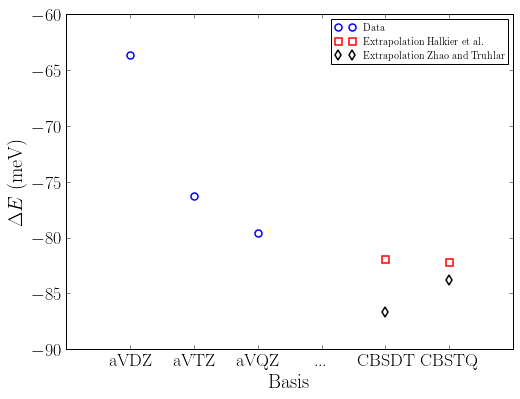

In [107]:
dfg = pd.read_csv('CSV/bn-w.gaussian.csv')
pd.options.display.max_columns = 50
pdefaultsg={'system':'b3n3h6-w','monomers':['b3n3h6','w']}
dfg=dfg[(dfg['system']==pdefaultsg['system']) | ((dfg['system']==pdefaultsg['monomers'][0]) & (dfg['cp']=='y')) | ((dfg['system']==pdefaultsg['monomers'][1]) & (dfg['cp']=='y') )]

sel=dfg[(dfg['zo']==3.36) & (dfg['worient']=='d')]
sels=sel[(sel['method']=='mp2') & (sel['basis']==cbs['smlbs'])]
dEmp2sml=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']==cbs['smlbs'])]
dEccsdtsml=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdtsml-dEmp2sml
sbasis=['aVDZ','aVTZ','aVQZ']
sdE=[]
for basis in sbasis:
    sels=sel[(sel['method']=='mp2') & (sel['basis']==basis)]
    dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
    sdE.append(dEmp2+dEdiffccsdtmp2)
sbasiscbs=['aVDTZ','aVTQZ']
sdEcbs=[]
sdEcbs.append(fccsdtcbs(dfg[dfg['worient']=='d'],{'X1':'aVDZ','X2':'aVTZ','smlbs':'631gd25'},3.36))
sdEcbs.append(fccsdtcbs(dfg[dfg['worient']=='d'],{'X1':'aVTZ','X2':'aVQZ','smlbs':'631gd25'},3.36))
sdEcbsT=[]
sdEcbsT.append(fccsdtcbsT(dfg[dfg['worient']=='d'],{'X1':'aVDZ','X2':'aVTZ','smlbs':'631gd25'},3.36))
sdEcbsT.append(fccsdtcbsT(dfg[dfg['worient']=='d'],{'X1':'aVTZ','X2':'aVQZ','smlbs':'631gd25'},3.36))

fig=plt.figure(figsize=(8,6))
plt.plot(np.array([2,3,4]),sdE,linestyle="",linewidth=1.5,marker='o',markersize=7,fillstyle='none',mew=1.5,color='b')
plt.plot(np.array([6,7]),sdEcbs,linestyle="",linewidth=1.5,marker='s',markersize=7,fillstyle='none',mew=1.5,color='r')
plt.plot(np.array([6,7]),sdEcbsT,linestyle="",linewidth=1.5,marker='d',markersize=7,fillstyle='none',mew=1.5,color='k')
# plt.xticks(xbasis, sbasis)
plt.xticks([2,3,4,5,6,7],['aVDZ','aVTZ','aVQZ','...','CBSDT','CBSTQ'])
plt.xlim(1,8)
plt.ylabel("$\Delta E$ (meV)", fontsize=20, fontweight='bold')
plt.xlabel("Basis",fontsize=20, fontweight='bold')
plt.legend(["Data","Extrapolation Halkier et al.","Extrapolation Zhao and Truhlar"])

[-63.598093157895505, -76.233149240875719, -79.598668718272734]
-81.9214655392
-82.1799182953


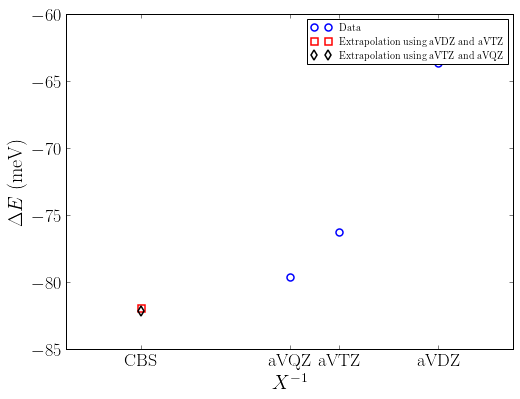

In [108]:
dEcbsDT=sdEcbs[0]
dEcbsTQ=sdEcbs[1]
fig=plt.figure(figsize=(8,6))
plt.plot(1/np.array([2,3,4]),sdE,linestyle="",linewidth=1.5,marker='o',markersize=7,fillstyle='none',mew=1.5,color='b')
plt.plot(0,dEcbsDT,linestyle="",linewidth=1.5,marker='s',markersize=7,fillstyle='none',mew=1.5,color='r')
plt.plot(0,dEcbsTQ,linestyle="",linewidth=1.5,marker='d',markersize=7,fillstyle='none',mew=1.5,color='k')
plt.xticks([0,1/4,1/3,1/2],['CBS','aVQZ','aVTZ','aVDZ'])
plt.xlim(-1/8,5/8)
plt.ylabel("$\Delta E$ (meV)", fontsize=20, fontweight='bold')
plt.xlabel("$X^{-1}$",fontsize=20, fontweight='bold')
plt.legend(["Data","Extrapolation using aVDZ and aVTZ","Extrapolation using aVTZ and aVQZ"])
print(sdE)
print(dEcbsDT)
print(dEcbsTQ)

[233, 506, 928]
[  1.00000000e+00   3.67091442e+01   1.27738441e+03]


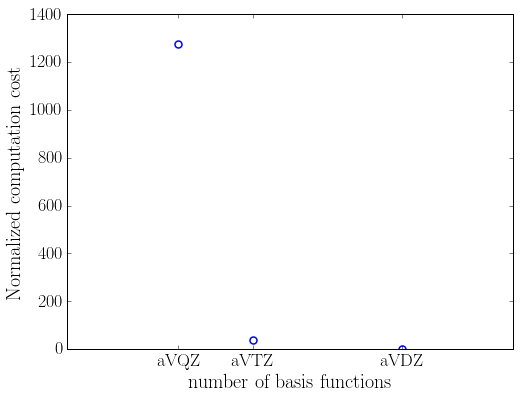

In [109]:
ncores={'aVDZ':8,'aVTZ':8,'aVQZ':16}
mem={'aVDZ':8,'aVTZ':24,'aVQZ':55} # gb
cputime={'aVDZ':1+16/60+44/3600,'aVTZ':15+38/60+56.3/3600,'aVQZ':(47+31/60+25.9/3600)*5}
nbasisfunction={'aVDZ':233,'aVTZ':506,'aVQZ':928}
nbasisgaussian={'aVDZ':389,'aVTZ':720,'aVQZ':1321}

snbf=[]
scputime=[]
for basis in ['aVDZ','aVTZ','aVQZ']:
    snbf.append(nbasisfunction[basis])
    scputime.append(cputime[basis]*mem[basis])

fig=plt.figure(figsize=(8,6))
plt.plot(1/np.array([2,3,4]),np.array(scputime)/scputime[0],linestyle="",linewidth=1.5,marker='o',markersize=7,fillstyle='none',mew=1.5,color='b')
plt.ylim(0,1400)
plt.ylabel("Normalized computation cost", fontsize=20, fontweight='bold')
plt.xlabel("number of basis functions",fontsize=20, fontweight='bold')
plt.xticks([1/4,1/3,1/2],['aVQZ','aVTZ','aVDZ'])
plt.xlim(1/8,5/8)
print(snbf)
print(np.array(scputime)/scputime[0])

[52.869718285534731, -38.004891301751911, -73.943909352434957, -81.921465539170256, -77.799358903394847, -68.550133972983929, -36.838881055594776, -23.449940955842436, -10.776493113406765, -5.7194958764368664]


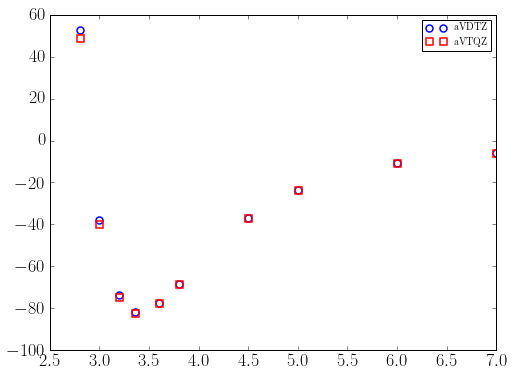

In [110]:
szo=[2.8,3.0,3.2,3.36,3.6,3.8,4.5,5.0,6.0,7.0]
sdEccsdtcbsaVDTZ=[]
sdEccsdtcbsaVTQZ=[]
for zo in szo:
    sdEccsdtcbsaVDTZ.append(fccsdtcbs(dfg[dfg['worient']=='d'],{'X1':'aVDZ','X2':'aVTZ','smlbs':'631gd25'},zo))
    sdEccsdtcbsaVTQZ.append(fccsdtcbs(dfg[dfg['worient']=='d'],{'X1':'aVTZ','X2':'aVQZ','smlbs':'631gd25'},zo))
print(sdEccsdtcbsaVDTZ)

fig=plt.figure(figsize=(8,6))
plt.plot(szo,sdEccsdtcbsaVDTZ,linestyle="",linewidth=1.5,marker='o',markersize=7,fillstyle='none',mew=1.5,color='b')
plt.plot(szo,sdEccsdtcbsaVTQZ,linestyle="",linewidth=1.5,marker='s',markersize=7,fillstyle='none',mew=1.5,color='r')
plt.legend(["aVDTZ","aVTQZ"])

In [116]:
sel=dfg[(dfg['zo']==3.36) & (dfg['worient']=='d')]
sels=sel[(sel['method']=='mp2') & (sel['basis']=='631gd25')]
dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']=='631gd25')]
dEccsdt=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdt-dEmp2
print("%-40s%10s%10s%10s"%('','dEmp2','dEccsdt','diff'))
print("%-40s%10.2f%10.2f%10.2f"%('d, 6-31G(d=0.25)',dEmp2,dEccsdt,dEdiffccsdtmp2))

sels=sel[(sel['method']=='mp2') & (sel['basis']=='aVTZ')]
dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']=='aVTZ')]
dEccsdt=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdt-dEmp2
print("%-40s%10.2f%10.2f%10.2f"%('d, aVTZ, @blacklight',dEmp2,dEccsdt,dEdiffccsdtmp2))

print("")


sel=dfg[(dfg['zo']==3.36) & (dfg['worient']=='u')]
sels=sel[(sel['method']=='mp2') & (sel['basis']=='631gd25')]
dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']=='631gd25')]
dEccsdt=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdt-dEmp2
print("%-40s%10s%10s%10s"%('','dEmp2','dEccsdt','diff'))
print("%-40s%10.2f%10.2f%10.2f"%('u, 6-31G(d=0.25)',dEmp2,dEccsdt,dEdiffccsdtmp2))

sels=sel[(sel['method']=='mp2') & (sel['basis']=='pVDZ')]
dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']=='pVDZ')]
dEccsdt=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdt-dEmp2
print("%-40s%10.2f%10.2f%10.2f"%('u, pVDZ',dEmp2,dEccsdt,dEdiffccsdtmp2))

sels=sel[(sel['method']=='mp2') & (sel['basis']=='pVTZ')]
dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']=='pVTZ')]
dEccsdt=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdt-dEmp2
print("%-40s%10.2f%10.2f%10.2f"%('u, pVTZ',dEmp2,dEccsdt,dEdiffccsdtmp2))

sels=sel[(sel['method']=='mp2') & (sel['basis']=='aVDZ')]
dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']=='aVDZ')]
dEccsdt=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdt-dEmp2
print("%-40s%10.2f%10.2f%10.2f"%('u, aVDZ',dEmp2,dEccsdt,dEdiffccsdtmp2))

sels=sel[(sel['method']=='mp2') & (sel['basis']=='aVTZ')]
dEmp2=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
sels=sel[(sel['method']=='ccsdt') & (sel['basis']=='aVTZ')]
dEccsdt=fdE(sels[sels['system']==pdefaultsg['system']], sels[sels['system']==pdefaultsg['monomers'][0]], sels[sels['system']==pdefaultsg['monomers'][1]])
dEdiffccsdtmp2=dEccsdt-dEmp2
print("%-40s%10.2f%10.2f%10.2f"%('u, aVTZ',dEmp2,dEccsdt,dEdiffccsdtmp2))

                                             dEmp2   dEccsdt      diff
d, 6-31G(d=0.25)                            -53.12    -55.04     -1.92
d, aVTZ, @blacklight                        -74.31    -79.69     -5.38

                                             dEmp2   dEccsdt      diff
u, 6-31G(d=0.25)                             10.80      9.17     -1.63
u, pVDZ                                      25.65     22.63     -3.02
u, pVTZ                                       4.21      2.90     -1.31
u, aVDZ                                      -9.04    -12.26     -3.22
u, aVTZ                                     -13.13    -16.41     -3.28
